<a href="https://colab.research.google.com/github/Sai-Chaithresh/Plant-leaf-disease-detection/blob/main/Parkinson%20Disease%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the parksinsions dataset
df = pd.read_csv('/parkinsons.csv')

In [7]:
#display basic info of the csv file
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (195, 24)
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA  

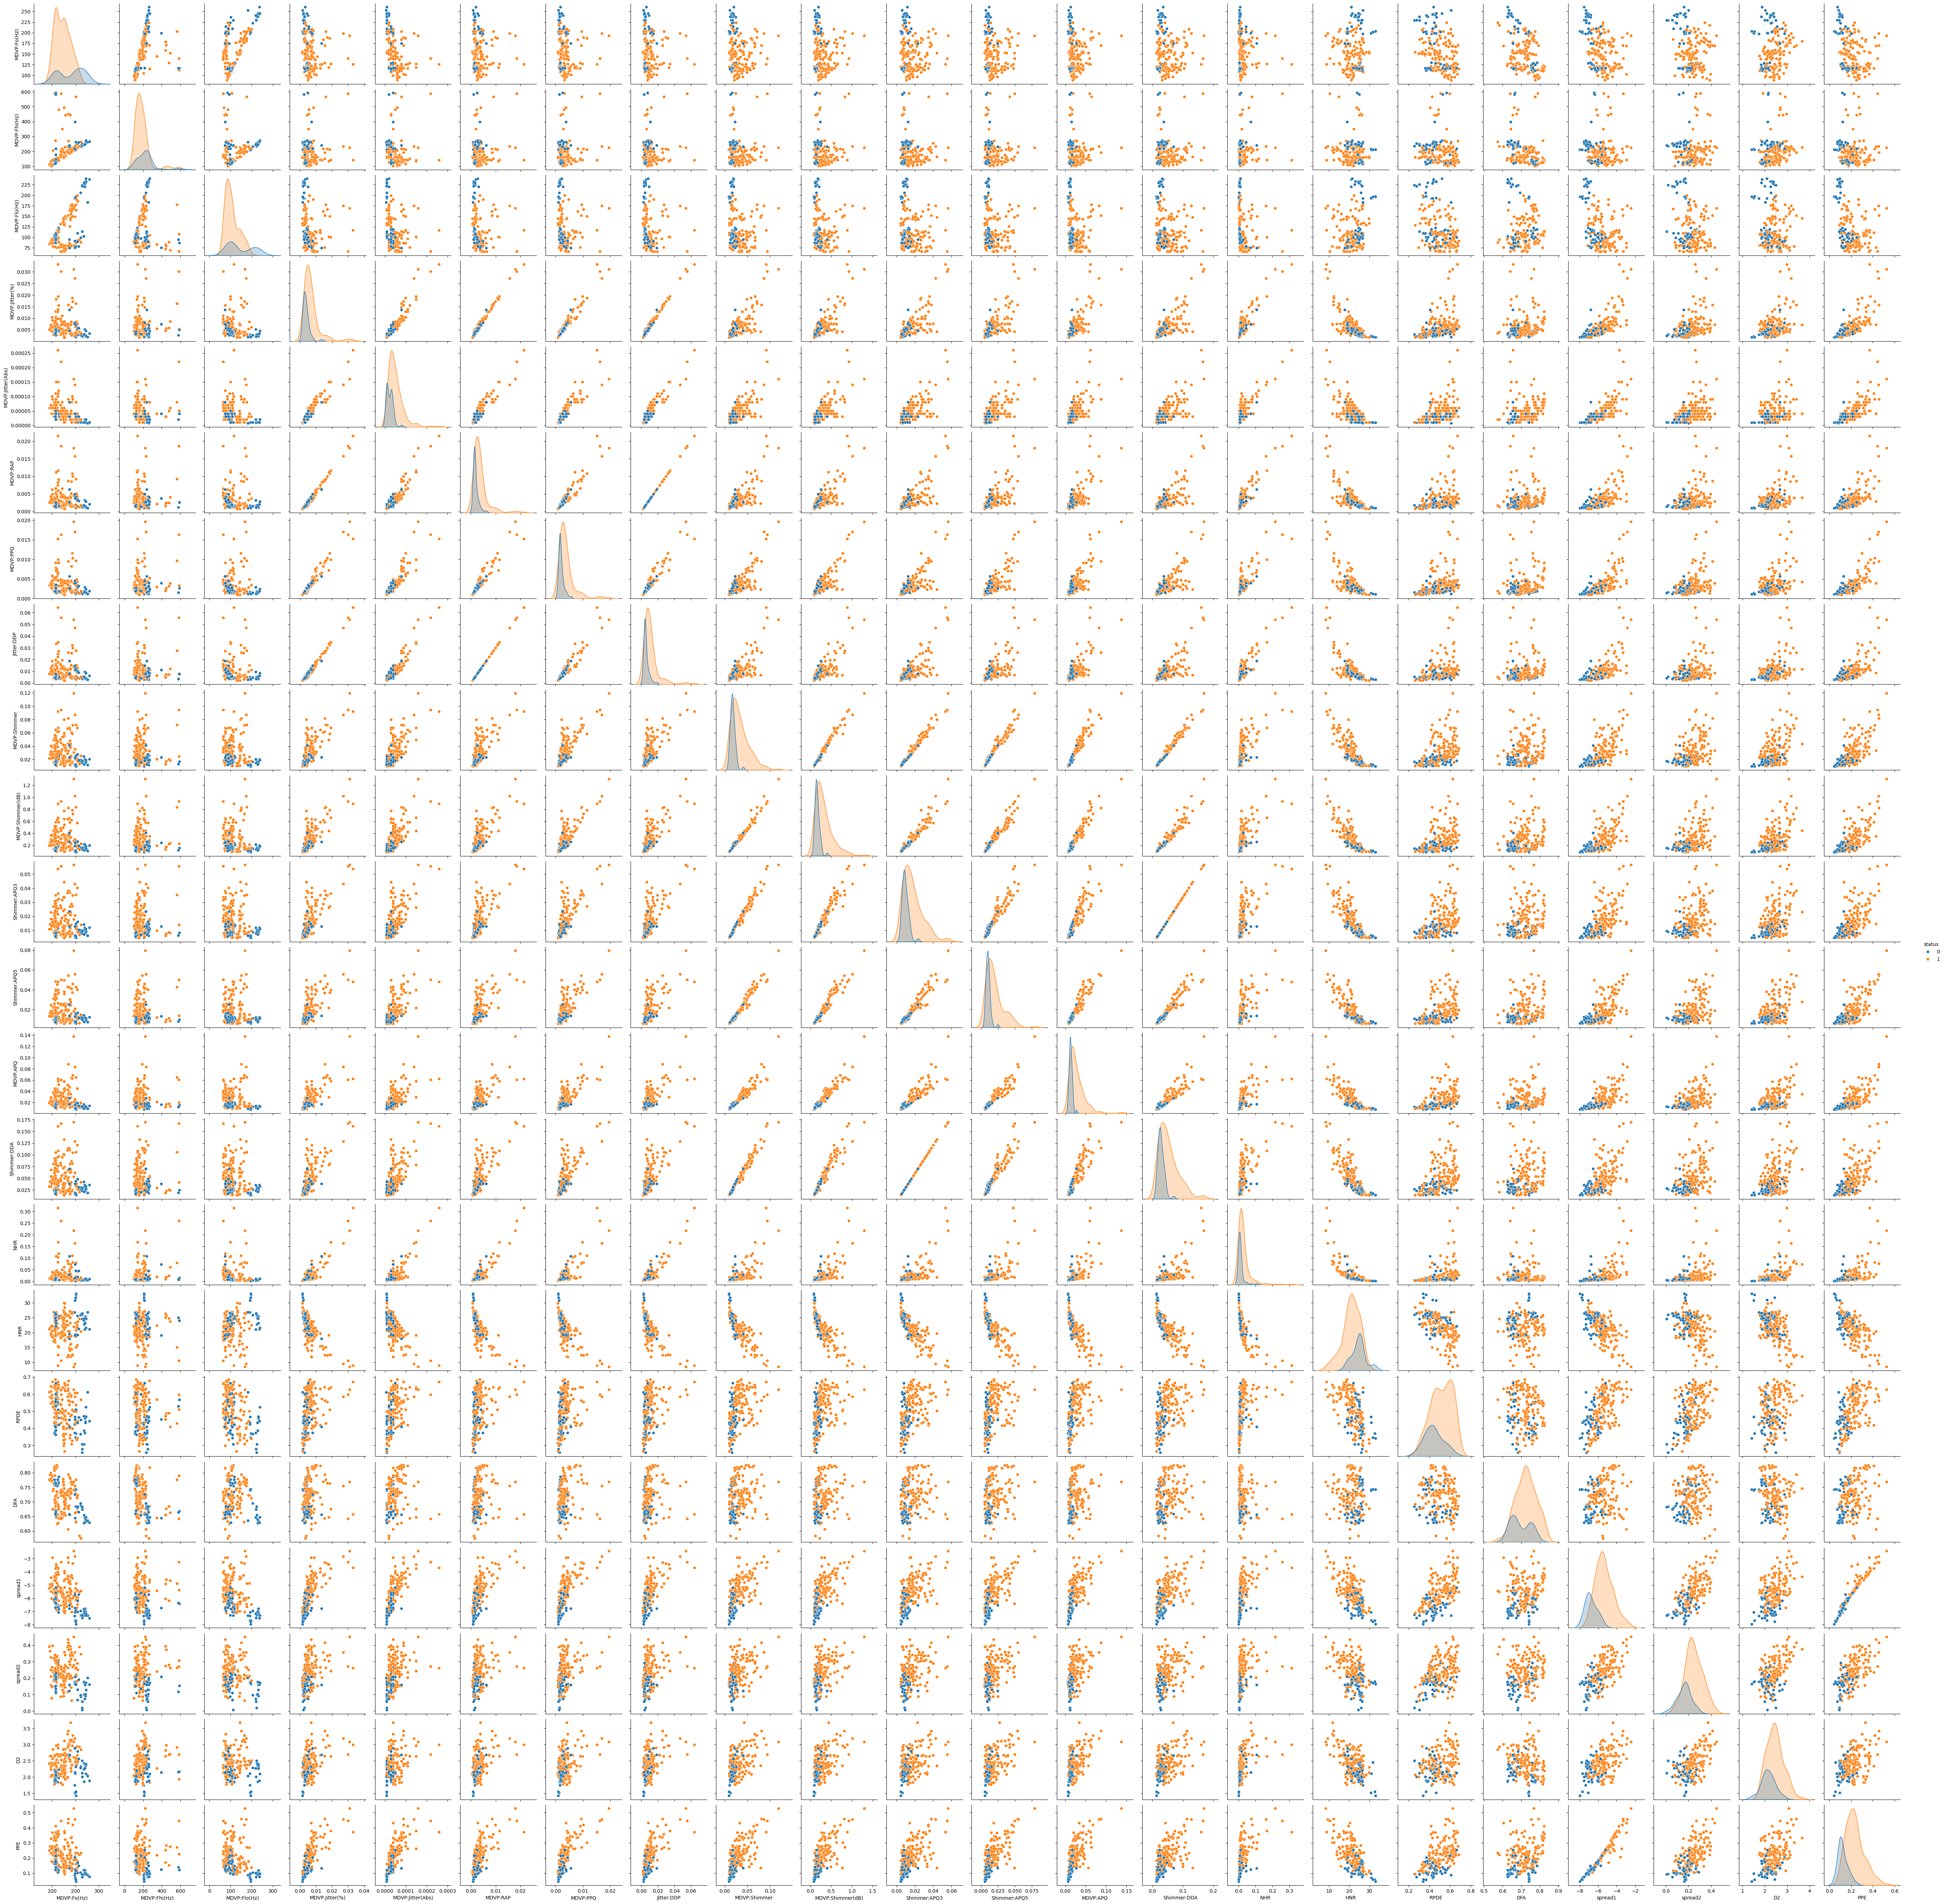

In [16]:
#display all the graphs of the dataset
sns.pairplot(df, hue='status')
plt.show()

In [8]:
#seperating the features from targets
features = df.loc[:, df.columns != 'status'].values[:, 1:]
labels = df.loc[:, 'status'].values

In [9]:
#spliting the data into training and testing models
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=7)

In [10]:
#normalize the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
#train the featured model
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [12]:
#testing the trained model
y_pred = model.predict(x_test)

In [13]:
#evaluating the trained model
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_test, y_pred)*100)

Accuracy Score: 94.87179487179486


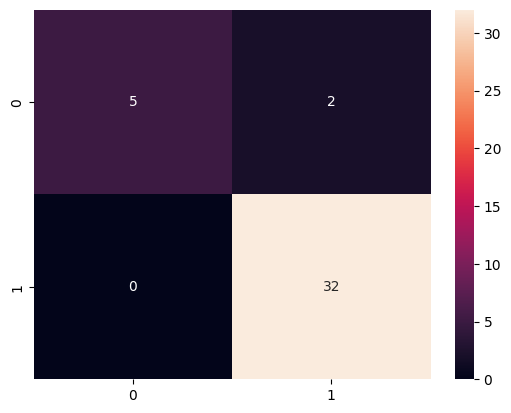

In [17]:
#increasing the accurary of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [19]:
#increase the model accuracy by hyper tuning

Accuracy Score: 94.87179487179486


In [20]:
#testing the best accurate model for the plotting
from sklearn.model_selection import GridSearchCV
y_pred = model.predict(x_test)

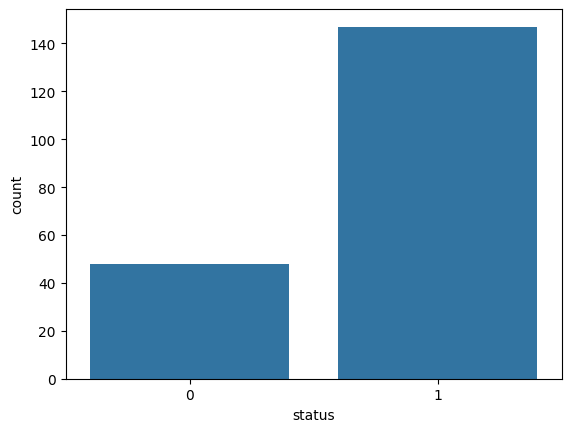

In [15]:
#plotting the dataset
sns.countplot(x='status', data=df)
plt.show()